## resize images

In [68]:
import skimage.transform as skTrans
import os
import cv2
import numpy as np
import pandas as pd
import re

source_path='C:\\TianLaptopData\\LaptopData\\desktop\\simulation new\\data set\\kth\\'
des_path='C:\\TianLaptopData\\LaptopData\\desktop\\simulation new\\data set\\kth\\preprocessed\\'
file_path = 'frames.txt'
os.chdir(source_path)

data = []
with open(file_path, 'r') as file:
    for line in file:
        # Splitting the line by tabs or multiple spaces
        parts = re.split('\tframes\t', line)

        #print(parts)
        action_id, frame_ranges = parts[0], parts[-1]
        action_id=re.sub('\t', '', action_id)
        frame_ranges=re.sub('\n', '', frame_ranges)
        
        # Extract all individual frame ranges
        ranges = re.split(',|-',frame_ranges)

        # Process the last 8 numbers (the last two ranges)
        last_8_numbers = []
        for range_part in ranges:
            last_8_numbers.append(int(range_part))

        # Divide the last 8 numbers into 4 number pairs
        data.append([action_id, last_8_numbers])

# Create a DataFrame from the collected data
df = pd.DataFrame(data, columns=['ID', 'Frames'])
os.chdir(source_path)
df.to_csv('frames.csv',index=False)

In [69]:
folders=['running','jogging','walking','boxing','handclapping','handwaving']
output_size=(4,4)
frame_number=4
invalid_files=[]
for f in folders:
    path_type=source_path+f
    files=os.listdir(path=path_type)
    for ff in files:
        os.chdir(path_type)
        cap = cv2.VideoCapture(ff)

        #read and preprocess each frame
        frames = []
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            resized_frame = cv2.resize(gray_frame, output_size, interpolation=cv2.INTER_AREA)
            normalized_frame = resized_frame / 255.0
            frames.append(normalized_frame)
            
        # divede videa into sequence
        row = df[df['ID'] == ff[0:-11]]
    
        # If the row is found, return the Content, otherwise return None
        if not row.empty:
            pages=list(row['Frames'])[0]
        else:
            pages=[1,len(frames)]
            
        #print([len(frames),pages[-1]])
        if len(frames)!=pages[-1]:
            invalid_files.append(ff)
            continue
            
        for i in range(0,len(pages),2):
            seq=frames[(pages[i]-1):pages[i+1]]
            
            #downsampling frames
            seq_down=[int(j) for j in np.linspace(0, len(seq)-1, frame_number)]
            seq_down=[seq[j] for j in seq_down]
            video_data = np.array(seq_down)
            name=ff[0:-11]+'_'+str(i//2)+'.npz'
            os.chdir(des_path)
            np.savez(name, video_data)
            
        


In [147]:
files=os.listdir(path=path_type)
for ff in ['person01_jogging_d1_uncomp.avi']:
    os.chdir('C:\\TianLaptopData\\LaptopData\\desktop\\simulation new\\data set\\kth\\jogging')
    cap = cv2.VideoCapture(ff)

    #read and preprocess each frame
    frames = []
    frames1 = []
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(gray_frame)
        resized_frame = cv2.resize(gray_frame, [4,4], interpolation=cv2.INTER_AREA)
        frames1.append(resized_frame)


In [155]:
i=121
print(frames[i])
print(frames1[i])

[[159 160 163 ... 166 166 165]
 [137 133 138 ... 137 138 136]
 [139 140 133 ... 132 133 137]
 ...
 [122 118 117 ... 114 116 124]
 [112 110 124 ... 118 117 115]
 [123 125 126 ... 119 114 109]]
[[135 135 136 137]
 [134 132 130 130]
 [134 137 139 139]
 [119 119 120 122]]


In [160]:
data4

array([[[0.5254902 , 0.52941176, 0.52941176, 0.53333333],
        [0.51764706, 0.50980392, 0.50980392, 0.50980392],
        [0.52941176, 0.5372549 , 0.54509804, 0.54509804],
        [0.4745098 , 0.47058824, 0.46666667, 0.4745098 ]],

       [[0.52941176, 0.52941176, 0.53333333, 0.51764706],
        [0.5254902 , 0.51764706, 0.51372549, 0.42352941],
        [0.53333333, 0.5372549 , 0.54509804, 0.41568627],
        [0.4745098 , 0.46666667, 0.45490196, 0.35294118]],

       [[0.54901961, 0.51372549, 0.55294118, 0.55686275],
        [0.54901961, 0.41176471, 0.5372549 , 0.5372549 ],
        [0.52941176, 0.37254902, 0.56078431, 0.56862745],
        [0.44705882, 0.42745098, 0.48627451, 0.50196078]],

       [[0.54117647, 0.54117647, 0.54509804, 0.55294118],
        [0.5372549 , 0.52941176, 0.5254902 , 0.5254902 ],
        [0.54117647, 0.55294118, 0.56078431, 0.56470588],
        [0.48235294, 0.48235294, 0.48235294, 0.49803922]]])

In [158]:
import numpy as np

# Load the .npz file
npz_data = np.load('C:\\TianLaptopData\\LaptopData\\desktop\\simulation new\\data set\\kth\\preprocessed\\person01_jogging_d1_2.npz')
array_data = npz_data.get('arr_0')
npz_data.close()

Keys in the .npz file: ['arr_0']
Shape of array_0: (4, 4, 4)
Array 'arr_0' shape: (4, 4, 4)


## SVM

In [81]:
import numpy as np
import os

# Specify the path to the folder containing the .npz files
testing_person=['02', '03', '05', '06', '07', '08']
type1=['running','jogging','walking']
type2=['boxing','handclapping','handwaving']
folder_path = 'C:\\TianLaptopData\\LaptopData\\desktop\\simulation new\\data set\\kth\\preprocessed\\'

# Get a list of all .npz files in the folder
npz_files = [file for file in os.listdir(folder_path) if file.endswith('.npz')]

# Initialize an empty list to store the flattened arrays
X_train = []
X_test = []
Y_train=[]
Y_test=[]
# Iterate over the list of .npz files
os.chdir(folder_path)
for filename in npz_files:
    # Construct the full file path
    array = np.load(filename)['arr_0']
    if filename[6:8] not in testing_person:
        X_train.append(array.flatten())
        Y_train.append(filename[9:-9] in type2)
    else:
        X_test.append(array.flatten())
        Y_test.append(filename[9:-9] in type2)

# Concatenate all flattened arrays into a single n*p array
# Note: This assumes all arrays have the same length when flattened
X_train = np.vstack(X_train)
X_test = np.vstack(X_test)

In [82]:
(X_train.shape)

(1697, 64)

In [83]:
from sklearn import svm
#X_train = df_train[:,1:-1]
#y_train = df_train[:,-1]
clf = svm.SVC()
clf.fit(X_train, Y_train)

SVC()

In [84]:
pred=clf.predict(X_test)

In [85]:
sum(pred==Y_test)/len(pred)

0.9626334519572953

In [86]:
sum(Y_train)/len(Y_train)

0.4908662345315262

# plotting

In [161]:
import numpy as np
import os
npz_path = 'C:\\TianLaptopData\\LaptopData\\desktop\\simulation new\\data set\\kth\\preprocessed\\'

# Load the NPZ file
os.chdir(npz_path)
npz_file = np.load('person01_boxing_d1_1.npz')
data1 = npz_file['arr_0']  # Adjust 'arr_0' if your array is stored under a different key
npz_file.close()

npz_file = np.load('person01_handclapping_d1_0.npz')
data2 = npz_file['arr_0']  # Adjust 'arr_0' if your array is stored under a different key
npz_file.close()

npz_file = np.load('person01_handwaving_d1_2.npz')
data3 = npz_file['arr_0']  # Adjust 'arr_0' if your array is stored under a different key
npz_file.close()

npz_file = np.load('person01_jogging_d1_2.npz')
data4 = npz_file['arr_0']  # Adjust 'arr_0' if your array is stored under a different key
npz_file.close()

npz_file = np.load('person01_running_d1_3.npz')
data5 = npz_file['arr_0']  # Adjust 'arr_0' if your array is stored under a different key
npz_file.close()

npz_file = np.load('person01_walking_d1_3.npz')
data6 = npz_file['arr_0']  # Adjust 'arr_0' if your array is stored under a different key
npz_file.close()

#---------------------------------
npz_file = np.load('person23_boxing_d3_1.npz')
data7 = npz_file['arr_0']  # Adjust 'arr_0' if your array is stored under a different key
npz_file.close()

npz_file = np.load('person23_jogging_d3_2.npz')
data10 = npz_file['arr_0']  # Adjust 'arr_0' if your array is stored under a different key
npz_file.close()

In [162]:
path = 'C:\\TianLaptopData\\LaptopData\\desktop\\simulation new\\data set\\kth\\images'
os.chdir(path)
np.savetxt("data11.csv", data1[0], delimiter=",")
np.savetxt("data12.csv", data1[1], delimiter=",")
np.savetxt("data13.csv", data1[2], delimiter=",")
np.savetxt("data14.csv", data1[3], delimiter=",")

np.savetxt("data21.csv", data2[0], delimiter=",")
np.savetxt("data22.csv", data2[1], delimiter=",")
np.savetxt("data23.csv", data2[2], delimiter=",")
np.savetxt("data24.csv", data2[3], delimiter=",")

np.savetxt("data31.csv", data3[0], delimiter=",")
np.savetxt("data32.csv", data3[1], delimiter=",")
np.savetxt("data33.csv", data3[2], delimiter=",")
np.savetxt("data34.csv", data3[3], delimiter=",")

np.savetxt("data41.csv", data4[0], delimiter=",")
np.savetxt("data42.csv", data4[1], delimiter=",")
np.savetxt("data43.csv", data4[2], delimiter=",")
np.savetxt("data44.csv", data4[3], delimiter=",")

np.savetxt("data51.csv", data5[0], delimiter=",")
np.savetxt("data52.csv", data5[1], delimiter=",")
np.savetxt("data53.csv", data5[2], delimiter=",")
np.savetxt("data54.csv", data5[3], delimiter=",")

np.savetxt("data61.csv", data6[0], delimiter=",")
np.savetxt("data62.csv", data6[1], delimiter=",")
np.savetxt("data63.csv", data6[2], delimiter=",")
np.savetxt("data64.csv", data6[3], delimiter=",")

#---------------------------
np.savetxt("data71.csv", data7[0], delimiter=",")
np.savetxt("data72.csv", data7[1], delimiter=",")
np.savetxt("data73.csv", data7[2], delimiter=",")
np.savetxt("data74.csv", data7[3], delimiter=",")

np.savetxt("data101.csv", data10[0], delimiter=",")
np.savetxt("data102.csv", data10[1], delimiter=",")
np.savetxt("data103.csv", data10[2], delimiter=",")
np.savetxt("data104.csv", data10[3], delimiter=",")



In [167]:
npz_path = 'C:\\TianLaptopData\\LaptopData\\desktop\\simulation new\\data set\\kth\\preprocessed\\'
os.chdir(npz_path)

npz_file = np.load('person23_boxing_d3_1.npz')
data7 = npz_file['arr_0']  # Adjust 'arr_0' if your array is stored under a different key
npz_file.close()

npz_file = np.load('person23_jogging_d3_2.npz')
data10 = npz_file['arr_0']  # Adjust 'arr_0' if your array is stored under a different key
npz_file.close()

path = 'C:\\TianLaptopData\\LaptopData\\desktop\\simulation new\\data set\\kth\\images'
os.chdir(path)

np.savetxt("data71.csv", data7[0], delimiter=",")
np.savetxt("data72.csv", data7[1], delimiter=",")
np.savetxt("data73.csv", data7[2], delimiter=",")
np.savetxt("data74.csv", data7[3], delimiter=",")

np.savetxt("data101.csv", data10[0], delimiter=",")
np.savetxt("data102.csv", data10[1], delimiter=",")
np.savetxt("data103.csv", data10[2], delimiter=",")
np.savetxt("data104.csv", data10[3], delimiter=",")


In [106]:
import matplotlib.pyplot as plt
im_path = 'C:\\TianLaptopData\\LaptopData\\desktop\\simulation new\\data set\\kth\\images'
os.chdir(im_path)

# Define the number of columns for subplotting
def plot_video(data,ii):
    columns = 4
    rows = (data.shape[0] + columns - 1) // columns  # Ensure all frames fit

    fig, axs = plt.subplots(rows, columns, figsize=(columns * 3, rows * 3))

    for i, ax in enumerate(axs.flat):
        if i < data.shape[0]:
            ax.imshow(data[i], cmap='gray', interpolation='nearest')
            ax.set_title(f'Frame {i + 1}')
            ax.axis('off')
        else:
            ax.axis('off')  # Hide unused subplots

    plt.tight_layout()
    name='frames_grid'+str(ii)+'.pdf'
    plt.savefig(name, format='pdf', dpi=300)  # Save the figure in PDF for high quality
    plt.show()


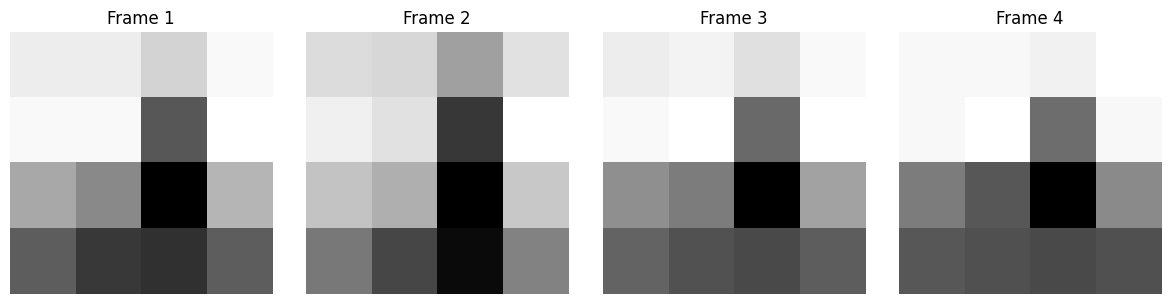

In [107]:
plot_video(data1,1)#boxing

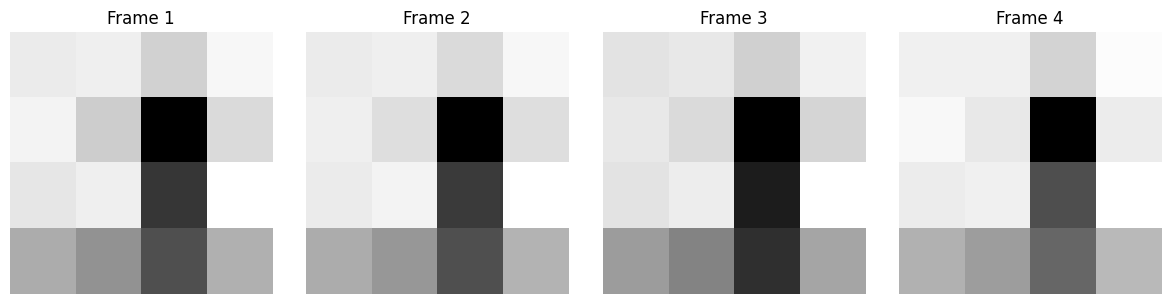

In [108]:
plot_video(data2,2)#handclapping

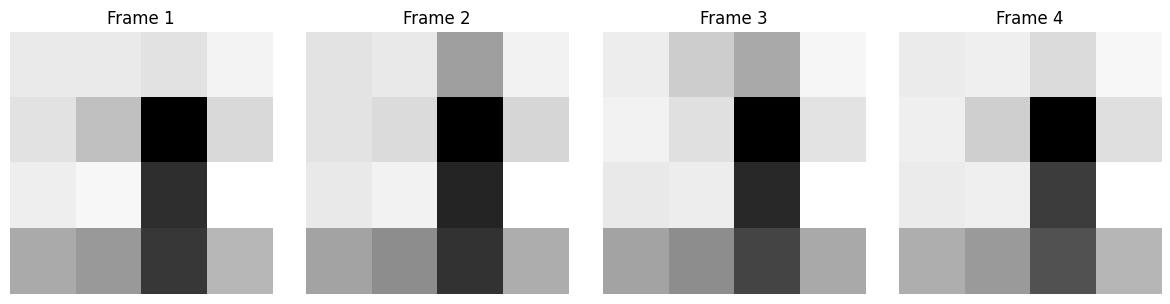

In [109]:
plot_video(data3,3)#handwaving

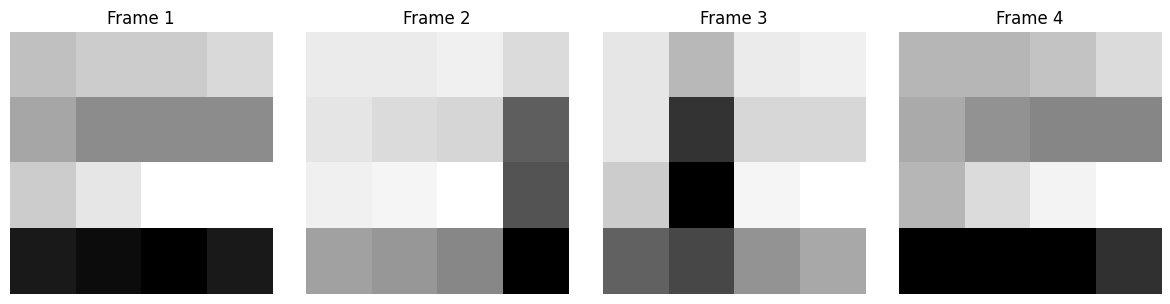

In [110]:
plot_video(data4,4)#jogging

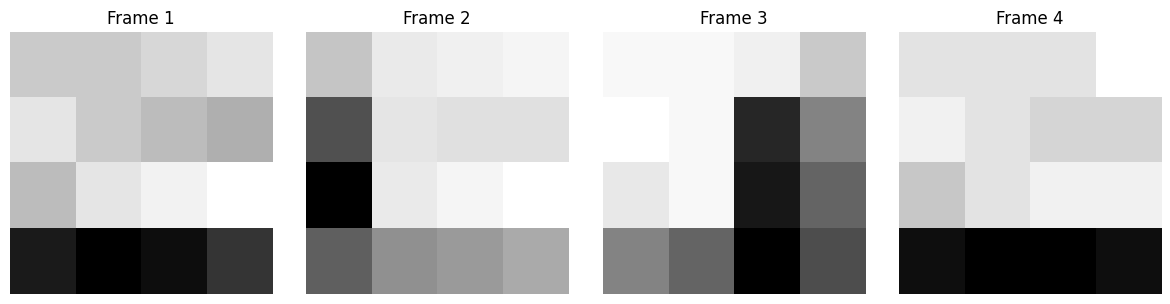

In [111]:
plot_video(data5,5)#running

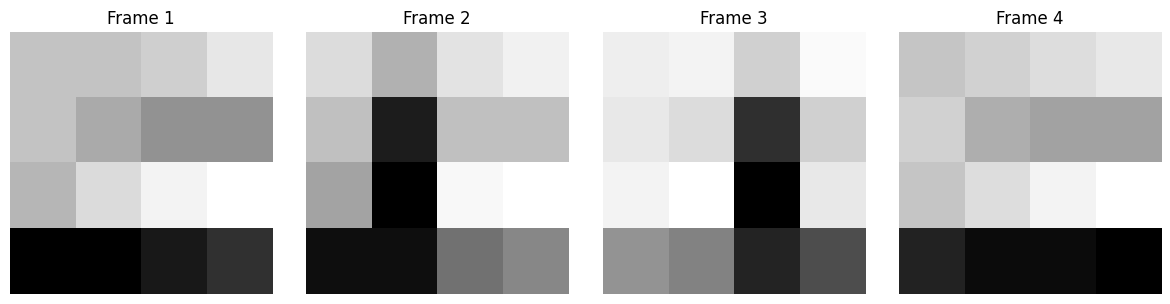

In [112]:
plot_video(data6,6)#walking

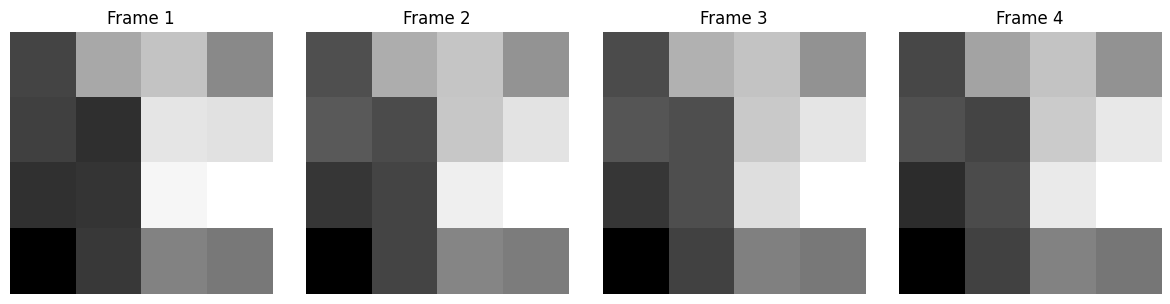

In [164]:
plot_video(data7,7)#walking

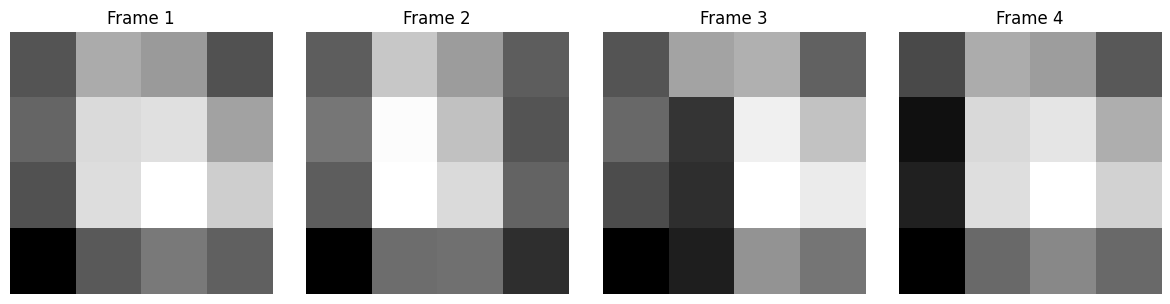

In [165]:
plot_video(data10,10)#walking